## TRAINING NEURAL NETWORK

In [3]:
# Load libraries
import numpy as np
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import csv file to google colab
from google.colab import files
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


In [4]:
#read the csv file using pandas
bank_df = pd.read_csv(io.BytesIO(uploaded['bank-additional-full.csv']))
# Dataset is now stored in a Pandas Dataframe

bank_df

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."
...,...
41183,"73;""retired"";""married"";""professional.course"";""..."
41184,"46;""blue-collar"";""married"";""professional.cours..."
41185,"56;""retired"";""married"";""university.degree"";""no..."
41186,"44;""technician"";""married"";""professional.course..."


In [ ]:
bank_df = pd.read_csv('bank-additional-full.csv', delimiter= ';')

In [ ]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Provide the Summary Statistics of the Dataset

bank_df.describe(include = "all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [ ]:
# Checking the missing values
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<AxesSubplot:>

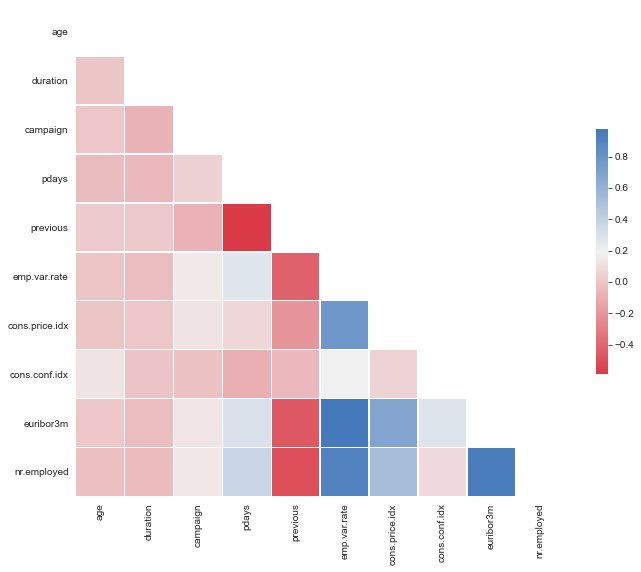

In [ ]:
# use the pands .corr() function to compute pairwise correlations for the dataframe
corr = bank_df.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [ ]:
# data cleaning for accurate result
# drop some irrelevant data 
bank_df.drop(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 
              'month', 'day_of_week', 'duration', 'poutcome'], axis = 1, inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Split the data into 80% training and 20% testing
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=42)

In [ ]:
X.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
z.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
y_transform = labelencoder.fit_transform(bank_df.y)

In [ ]:
y_transform

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
#Prepare the training set

# X = feature values, all the columns except the last column
X = bank_df.iloc[:, : -1]

# y = target values, last column of the data frame
z = bank_df.iloc[:, -1]

In [ ]:
# Data Pre-processing (Data preparation). Data normalization. 
# map all values in every columns to the range of 0 and 1.

from sklearn import preprocessing

feature_scaler = preprocessing.MinMaxScaler()
target_scaler = preprocessing.MinMaxScaler()

X = feature_scaler.fit_transform(X)
z = target_scaler.fit_transform(y_transform.reshape(-1, 1))

In [ ]:
print(X.shape)
print(z.shape)

(41188, 8)
(41188, 1)


In [ ]:
# Load libraries
from keras import models
from keras import layers

In [ ]:
# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", input_shape=(8,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
optimizer="rmsprop", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric

In [ ]:
# Train neural network
history = network.fit(X_train, # Features
z_train, # Target vector
epochs=3, # Number of epochs
verbose=1, # Print description after each epoch
batch_size=50, # Number of observations per batch
validation_data=(X_test, z_test)) # Test data

Epoch 1/3
659/659 [==============================] - 31s 30ms/step - loss: 0.3057 - accuracy: 0.8919 - val_loss: 0.2932 - val_accuracy: 0.8968
Epoch 2/3
659/659 [==============================] - 2s 3ms/step - loss: 0.2856 - accuracy: 0.8992 - val_loss: 0.2918 - val_accuracy: 0.8974
Epoch 3/3
659/659 [==============================] - 2s 3ms/step - loss: 0.2846 - accuracy: 0.8996 - val_loss: 0.2914 - val_accuracy: 0.8975


In [ ]:
# Predict classes of test set
predicted_target = network.predict(X_test)

In [ ]:
predicted_target

array([[0.11512202],
       [0.04253301],
       [0.11483562],
       ...,
       [0.08821696],
       [0.0444726 ],
       [0.04256782]], dtype=float32)

In [ ]:
# View the probability the first observation is class 1
predicted_target[1]

array([0.04253301], dtype=float32)

VISUALIZATION

In [ ]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

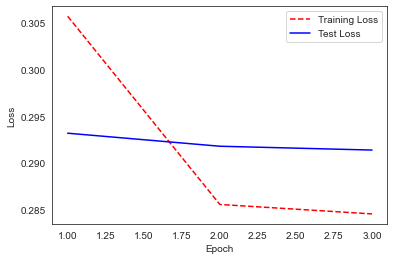

In [ ]:
import matplotlib.pyplot as plt
# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()